# The mission statement
<b><i>Bella beat, a high-tech company that manufactures health-focused smart products wants to analyse the usage of one of their products in order to gain insight into how people are already using their smart devices.Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.</i></b>

<img src=https://media.self.com/photos/64063998753c98598ce42cde/16:9/w_8719,h_4904,c_limit/benfits%20of%20running.jpeg>

### Table of content
1. Questions and Business Objective
2. Data Preparation
3. Data Processing and Analysis
4. Conclusions

## 1. Business Objectives and Questions

The primary objective is to provide Bellabeat stakeholders with valuable insights and patterns regarding the usage of their smart devices. A comprehensive user analysis will unlock the potential for informed decision-making in terms of marketing strategy and product development.

Questions to answer:
1. What are the patterns of users?
2. How company could take advanteage of existing patterns to develop better products?

## 2. Data Preparation

For this case study, we utilized FitBit Fitness Tracker Data as the data source. The datasets were generated through a survey distributed via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users provided consent to share their personal tracker data, including minute-level outputs for physical activity, heart rate, and sleep monitoring. The variation in the outputs reflects the use of different types of Fitbit trackers and individual tracking behaviors/preferences.

In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns =50
pd.options.display.float_format = '{:.2f}'.format

In [30]:
activity = pd.read_csv("dailyActivity_merged.csv")
calories = pd.read_csv("dailyCalories_merged.csv")
intensities = pd.read_csv("dailyIntensities_merged.csv")
steps = pd.read_csv("dailySteps_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")

In [31]:
#Creating dictionary to process all dataset in a loop
df_dict = {"Daily_Activities": activity, "Daily_Calories": calories, "Daily_Intesities": intensities, 
          "Daily_Steps": steps, "Daily_Sleep": sleep}

In [32]:
#Short View on each dataset
for item in df_dict:
    df = df_dict[item]
    print(f'{item}\n number of rows: {df.shape[0]}, columns:{df.shape[0]}, missing values: {df.isna().sum().sum()}\n')

Daily_Activities
 number of rows: 940, columns:940, missing values: 0

Daily_Calories
 number of rows: 940, columns:940, missing values: 0

Daily_Intesities
 number of rows: 940, columns:940, missing values: 0

Daily_Steps
 number of rows: 940, columns:940, missing values: 0

Daily_Sleep
 number of rows: 413, columns:413, missing values: 0



Upon initial examination, it is evident that the Daily_Sleep dataset is shorter than the others, with no missing values observed.

### More details about datasets

In [33]:
for item in df_dict:
    df = df_dict[item]
    print(f'{item}:\n')
    print(f'{df.info()}\n]+\n')

Daily_Activities:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int6

Daily_Activities dataset cover all columns from other tables apart from Daily_sleep. In order to analyze sleep data with user activity merging both tables might be a good option.

In [34]:
print(f'Number of unique users in Activity dataset: {activity.Id.nunique()}')
print(f'Number of unique users in Sleep dataset: {sleep.Id.nunique()}')

Number of unique users in Activity dataset: 33
Number of unique users in Sleep dataset: 24


The Daily_Activities dataset covers all columns from the other tables, except for Daily_Sleep. To analyze sleep data alongside user activity, merging these two tables seems like a suitable option. However, it's important to note that the Activity dataset only includes data from 33 unique users, making it less representative. By merging both datasets, we reduce the number of users to 24. Another consideration is the lack of information about users' places of residence. We cannot confirm whether users are from the same region or country, therefore they might be living in completly different enviroments, which might result in different habits

### Understanding basic statistics

In [35]:
print(activity[['TotalSteps', 'TotalDistance','VeryActiveMinutes','FairlyActiveMinutes', \
          'LightlyActiveMinutes','SedentaryMinutes']].describe())

       TotalSteps  TotalDistance  VeryActiveMinutes  FairlyActiveMinutes  \
count      940.00         940.00             940.00               940.00   
mean      7637.91           5.49              21.16                13.56   
std       5087.15           3.92              32.84                19.99   
min          0.00           0.00               0.00                 0.00   
25%       3789.75           2.62               0.00                 0.00   
50%       7405.50           5.24               4.00                 6.00   
75%      10727.00           7.71              32.00                19.00   
max      36019.00          28.03             210.00               143.00   

       LightlyActiveMinutes  SedentaryMinutes  
count                940.00            940.00  
mean                 192.81            991.21  
std                  109.17            301.27  
min                    0.00              0.00  
25%                  127.00            729.75  
50%                  199.00

The most frequent activities observed while using the tracker devices are sedentary and light activity. On average, the surveyed individuals take approximately 7,638 steps per day, which does not align with the WHO recommendations.

### 3. Data Processing and Analysis

In [36]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])

In [37]:
#Merge sleep data with activity data
merged = activity.merge(sleep, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'] )

In [38]:
#Adding day name column
merged['WeekDay'] = merged.ActivityDate.dt.day_name()

In [39]:
time_sleep_per_day = merged.groupby('WeekDay')[['TotalTimeInBed', 'TotalMinutesAsleep']].mean()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(days_order,range(len(days_order))))
time_sleep_per_day['Day_id'] = time_sleep_per_day.index
time_sleep_per_day['Day_id'] = time_sleep_per_day['Day_id'].map(sorterIndex)
time_sleep_per_day.sort_values(by='Day_id', inplace=True)

In [40]:
time_sleep_per_day_melt = time_sleep_per_day.reset_index().melt(id_vars=['Day_id', 'WeekDay'], var_name='Category', value_name='Minutes')
time_sleep_per_day_melt

,Day_id,WeekDay,Category,Minutes
0,0,Monday,TotalTimeInBed,456.17
1,1,Tuesday,TotalTimeInBed,443.29
2,2,Wednesday,TotalTimeInBed,470.03
3,3,Thursday,TotalTimeInBed,435.80
4,4,Friday,TotalTimeInBed,445.05
5,5,Saturday,TotalTimeInBed,461.28
6,6,Sunday,TotalTimeInBed,503.51
7,0,Monday,TotalMinutesAsleep,418.83
8,1,Tuesday,TotalMinutesAsleep,404.54
9,2,Wednesday,TotalMinutesAsleep,434.68


## How many minutes people sleep and stay in bed ?

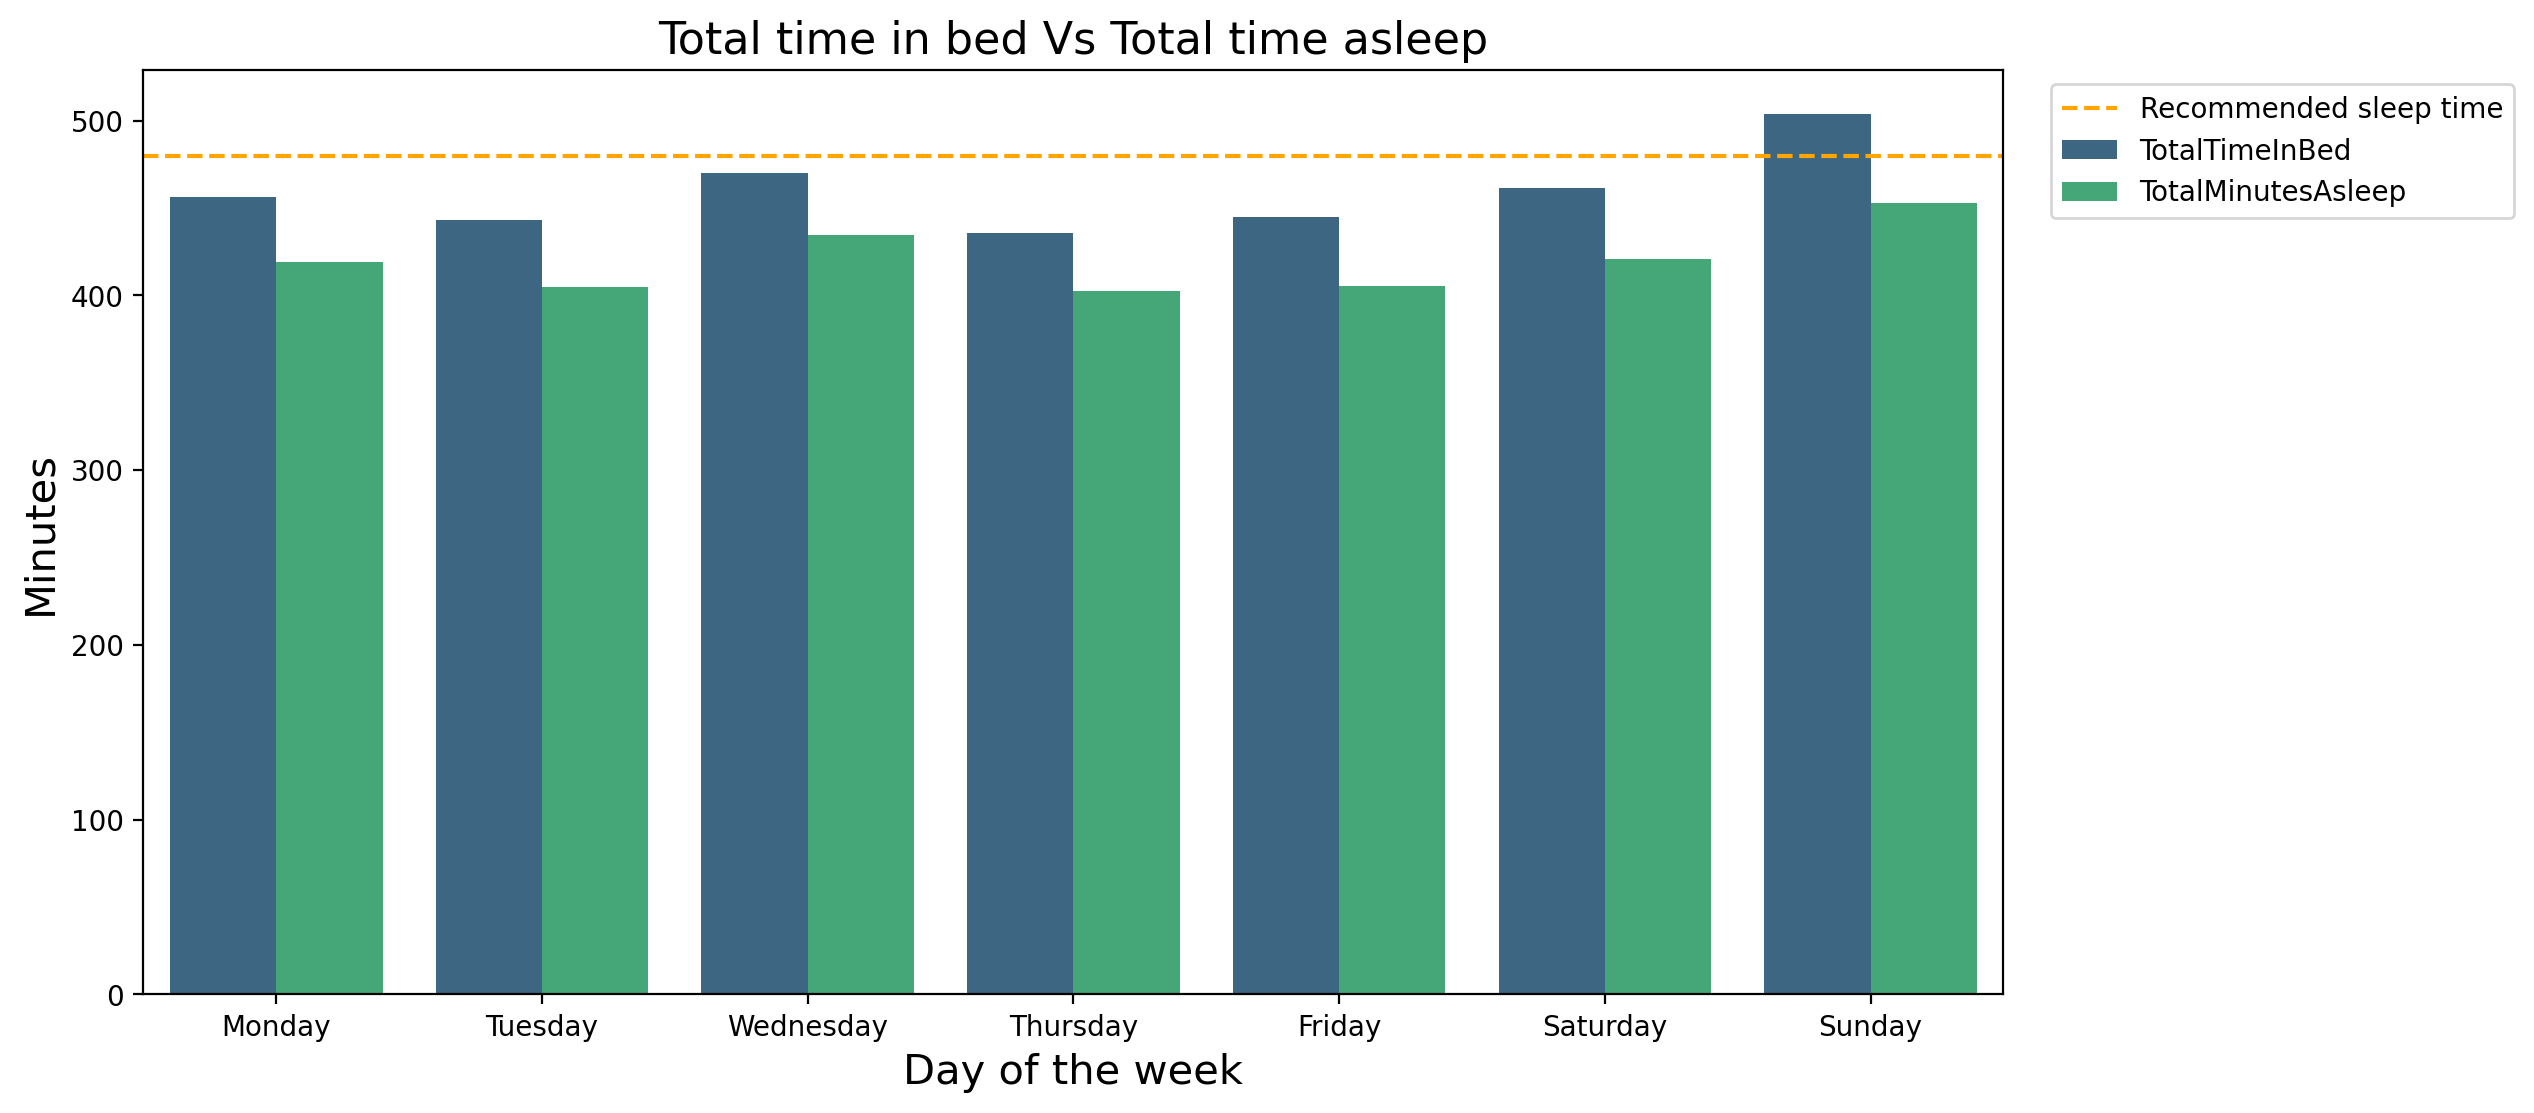

In [41]:
plt.figure(figsize=(12,6), dpi=200)
barplot = sns.barplot(time_sleep_per_day_melt, x='WeekDay', y='Minutes', hue='Category', palette='viridis')
plt.title('Total time in bed Vs Total time asleep', fontsize=16)
plt.axhline(y = 480, color = 'orange', linestyle = '--', label='Recommended sleep time')
plt.ylabel('Minutes', fontsize = 15)
plt.xlabel('Day of the week', fontsize = 15)
plt.legend(bbox_to_anchor = (1.15, 1), loc = 'upper center')
plt.show()

Two major patterns can be observed from the data:

1. On average, users sleep less than the recommended minimum of 8 hours per day.
2. Sundays show an interesting pattern, where people tend to spend more time in bed without sleeping. This could indicate that some users have difficulties achieving quality sleep. 

In [42]:
time_sleep_per_day['TimeInBedAwake'] = time_sleep_per_day.TotalTimeInBed - time_sleep_per_day.TotalMinutesAsleep

## What's the average of time spend in bed not sleeping?

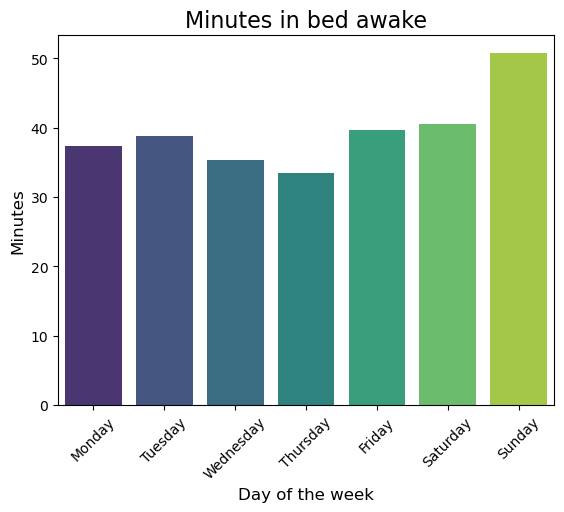

In [43]:
bar_awake = sns.barplot(time_sleep_per_day, x=time_sleep_per_day.index, y='TimeInBedAwake', palette='viridis')
plt.title('Minutes in bed awake', fontsize=16)
plt.ylabel('Minutes', fontsize = 12)
plt.xlabel('Day of the week', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

One fascinating insight is that people tend to spend more time in bed without sleeping on weekends. Bellabeat could leverage this information by creating reminders targeting users who are scrolling through their phones in bed and suggesting exercises or training routines in the morning

## Daily steps per weekday

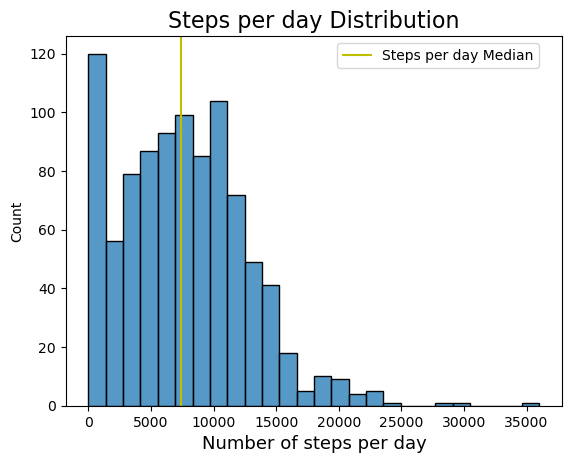

In [44]:
med_steps_per_day = activity.TotalSteps.median()
sns.histplot(activity, x='TotalSteps')
plt.axvline(med_steps_per_day, color='y', label='Steps per day Median')
plt.xlabel('Number of steps per day', fontsize = 13)
plt.title('Steps per day Distribution', fontsize=16)
plt.legend(bbox_to_anchor = (0.75, 1), loc = 'upper center')
plt.show()


plt.show()

In [45]:
activity['Weekday'] = activity.ActivityDate.dt.day_name()

In [46]:
steps_per_day = activity.groupby('Weekday', as_index=False)['TotalSteps'].mean()
steps_per_day = pd.DataFrame(steps_per_day)

In [47]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(days_order,range(len(days_order))))
steps_per_day['Day_id'] = steps_per_day['Weekday'].map(sorterIndex)
steps_per_day.sort_values(by='Day_id', inplace=True)
steps_per_day

,Weekday,TotalSteps,Day_id
1,Monday,7780.87,0
5,Tuesday,8125.01,1
6,Wednesday,7559.37,2
4,Thursday,7405.84,3
0,Friday,7448.23,4
2,Saturday,8152.98,5
3,Sunday,6933.23,6


## Daily steps per weekday

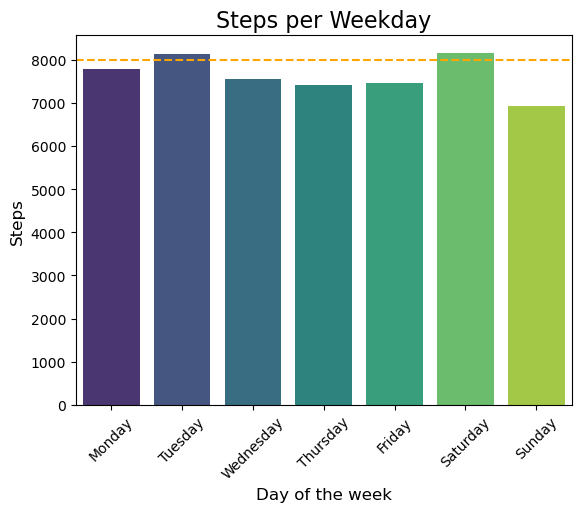

In [48]:
bar_steps = sns.barplot(steps_per_day, x='Weekday', y='TotalSteps', palette='viridis')
plt.title('Steps per Weekday', fontsize=16)
plt.ylabel('Steps', fontsize = 12)
plt.xlabel('Day of the week', fontsize = 12)
plt.axhline(y = 8000, color = 'orange', linestyle = '--', label='Minimum Number of Steps recomennded by WHO')
plt.xticks(rotation=45)
plt.show()

As mentioned earlier, users struggle to surpass the WHO-recommended minimum of 8,000 steps per day to reduce the risk of cardiovascular disease. On average, only Tuesdays and Saturdays show slight adherence to this recommendation. Sundays, in particular, present an opportunity for the company to target users with training ideas, challenges, and notifications.

### User Type Distribution

In [49]:
users_agg = activity.groupby('Id', as_index=False)[['VeryActiveMinutes','FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes','TotalDistance']].sum()
sleeping_stats = sleep.groupby('Id', as_index=False)['TotalMinutesAsleep'].mean()
sleeping_merged = sleeping_stats.merge(users_agg, how='inner', on='Id')

In [50]:
#users_agg = activity.groupby('Id', as_index=False)[['VeryActiveMinutes','FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum()
#users_agg = sleeping_merged.groupby('Id', as_index=False)[['VeryActiveMinutes','FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalDistance']].sum()
users_agg = sleeping_merged
active  = users_agg["VeryActiveMinutes"]
fairly = users_agg["FairlyActiveMinutes"]
lightly = users_agg["LightlyActiveMinutes"]
sedenter = users_agg["SedentaryMinutes"]

avg_sedentar = users_agg.SedentaryMinutes.mean()
avg_lightly = users_agg.LightlyActiveMinutes.mean()
avg_fairly = users_agg.FairlyActiveMinutes.mean()
avg_active = users_agg.VeryActiveMinutes.mean()

# List of conditions
conditions = [
      (sedenter < avg_sedentar) &  (lightly < avg_lightly) & (fairly < avg_fairly) &  (active < avg_active)
    , (sedenter > avg_sedentar) &  (lightly < avg_lightly)
    , (sedenter > avg_sedentar) &  (lightly > avg_lightly)
    , (sedenter < avg_sedentar) &  (lightly > avg_lightly) & (fairly < avg_fairly) &  (active < avg_active)
    , (sedenter < avg_sedentar) &  (lightly > avg_lightly) & (fairly > avg_fairly) &  (active < avg_active)
    , (sedenter < avg_sedentar) & (fairly > avg_fairly) 
    , (sedenter < avg_sedentar) & (fairly > avg_fairly) &  (active > avg_active)
    , (sedenter < avg_sedentar) & (active > avg_active)
]

choices  = [
      "Sedentery"
    , "Sedentery"
    , "Sedentery"
    , "Light Active"
    , "Light Active"
    , "Active"
    , "Very Active"
    , "Very Active"
]

users_agg["User_type"] = np.select(conditions, choices, "ERROR")

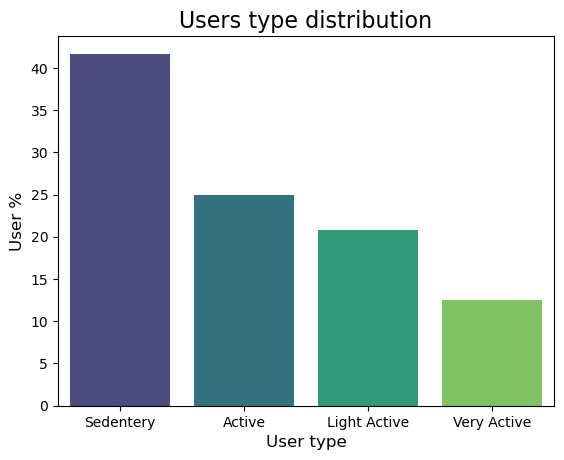

In [72]:
user_types = users_agg.value_counts('User_type', normalize=True)
bar = sns.barplot(x=user_types.index, y=user_types.values*100, palette='viridis')
plt.title('Users type distribution', fontsize=16)
plt.ylabel('User %', fontsize = 12)
plt.xlabel('User type', fontsize = 12)
plt.show()

Sedentary lifestyle appears to be the most prevalent among users, while the most active lifestyle is less popular, as expected. However, Bellabeat has significant potential to activate sedentary individuals and encourage them to transition to a more active lifestyle through appropriate marketing and communication strategies.

In [52]:
min_sleep = 360
over_sleep = 480
sleeping = sleeping_merged["TotalMinutesAsleep"]

conditions = [
      (sleeping < min_sleep) 
    , (sleeping > min_sleep) &  (sleeping < over_sleep)
    , (sleeping > over_sleep) 
]

choices  = [
      "Not enough sleep"
    , "Optimum sleep"
    , "Oversleeping"
]

users_agg["Sleep_type"] = np.select(conditions, choices, "ERROR")

In [63]:
sleep_agg = pd.DataFrame(users_agg.groupby(by=['User_type','Sleep_type'], as_index=False)['Id'].count())
sleep_agg['Total per category'] = sleep_agg.groupby('User_type')['Id'].transform('sum')
sleep_agg['total%'] = sleep_agg['Id']/sleep_agg['Total per category']*100

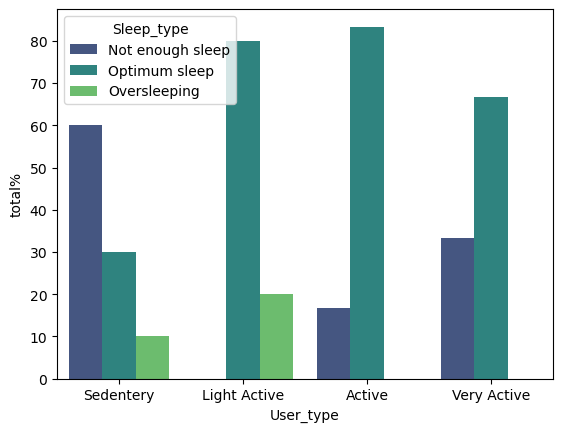

In [61]:
bar_sleep = sns.barplot(data=sleep_agg,
                        x='User_type',
                        y='total%', hue='Sleep_type',
                        order=['Sedentery', 'Light Active', 'Active', 'Very Active'],
                       palette='viridis')
plt.show()

When analyzing each group individually, an interesting finding emerges: among all active groups, over 50% of users tend to have satisfactory sleep. However, individuals who lead a sedentary lifestyle appear to face challenges in obtaining an adequate amount of sleep. This insight holds significant value for the company as it presents an opportunity to target this specific group and encourage them to prioritize timely bedtimes and improve the quality of their sleep.

Furthermore, another intriguing pattern can be observed within the group of highly active users. Surprisingly, a portion of these individuals also experiences difficulties in achieving sufficient sleep.

Text(0.5, 1.0, 'Total Daily Steps Vs Calories')

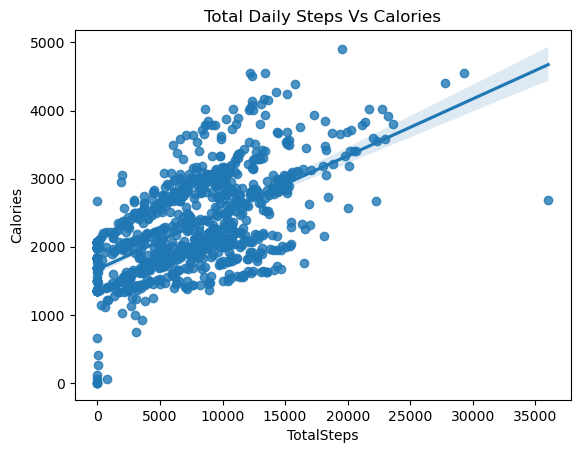

In [74]:
sns.regplot(activity, x='TotalSteps', y='Calories')
plt.title("Total Daily Steps Vs Calories")
plt.show()

The above chart present obvius correlation between total number of steps per day and burnt calorties. The mores steps users do per day the more calories they burn.

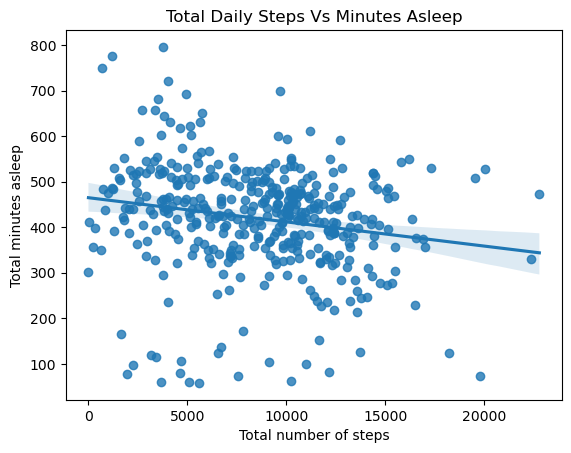

In [65]:
sns.regplot(merged, x='TotalSteps', y='TotalMinutesAsleep')
plt.title("Total Daily Steps Vs Minutes Asleep")
plt.ylabel('Total minutes asleep')
plt.xlabel('Total number of steps')
plt.show()

The correlation between the number of steps and the total number of steps per day shows a slight negative relationship. This finding suggests that highly active users might face challenges when it comes to maintaining healthy sleeping habits.

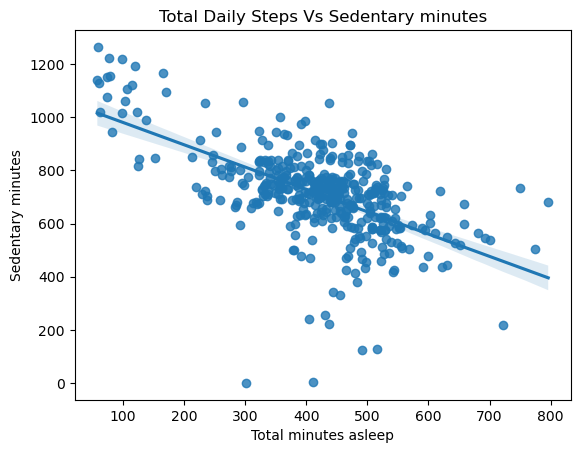

In [64]:
sns.regplot(merged, x='TotalMinutesAsleep', y='SedentaryMinutes')
plt.title("Total Daily Steps Vs Sedentary minutes")
plt.xlabel('Total minutes asleep')
plt.ylabel('Sedentary minutes')
plt.show()

The relationship between sedentary minutes and minutes asleep reveals intriguing insights and potential opportunities for the company. It is noteworthy that individuals with the highest sedentary minutes per day tend to experience difficulties in obtaining sufficient sleep. 
This finding suggests that implementing interventions to promote healthier sleep habits among individuals with high sedentary minutes per day could be a strategic approach for the company to achieve positive outcomes.

## 4.Conclusions

Based on the analysis of user data, several patterns and insights have emerged. Firstly, it is evident that users, on average, are not meeting the recommended minimum of 8 hours of sleep per day. Additionally, Sundays stand out as a day when users spend more time in bed without sleeping, indicating potential difficulties in achieving quality sleep. These findings present opportunities for Bellabeat to intervene and address sleep-related issues among its users.

Moreover, it is clear that users struggle to reach the recommended daily step count of 8,000, which is essential for reducing the risk of cardiovascular diseases. Only Tuesdays and Saturdays show slight adherence to this recommendation. Sundays, in particular, provide an excellent opportunity for the company to engage users with training ideas, challenges, and notifications to encourage more physical activity.

The prevalence of a sedentary lifestyle among users is notable, while the most active lifestyle is less popular, as expected. However, Bellabeat has the potential to activate sedentary individuals and motivate them to transition to a more active lifestyle through effective marketing and communication strategies.

Furthermore, among all active groups, it is encouraging to see that over 50% of users tend to have satisfactory sleep. However, individuals leading a sedentary lifestyle face challenges in obtaining adequate sleep. This insight is valuable for Bellabeat as it highlights the opportunity to target this specific group and promote better sleep habits.

In terms of marketing strategy, Bellabeat can leverage the finding that people tend to spend more time in bed without sleeping on weekends. By creating reminders and tailored suggestions for exercises or training routines in the morning, the company can help users make the most of their weekend mornings and establish healthy sleep patterns.

Possible updates/developments for Bellabeat's fitness products could include integrating features that provide sleep-related insights, personalized sleep recommendations, and reminders to maintain consistent bedtimes. Additionally, the smartwatches could offer specialized training programs or challenges specifically designed for Sundays, targeting users to engage in physical activity on that day.